 <font size="10">Méthodes de segmentation et résultats</font>

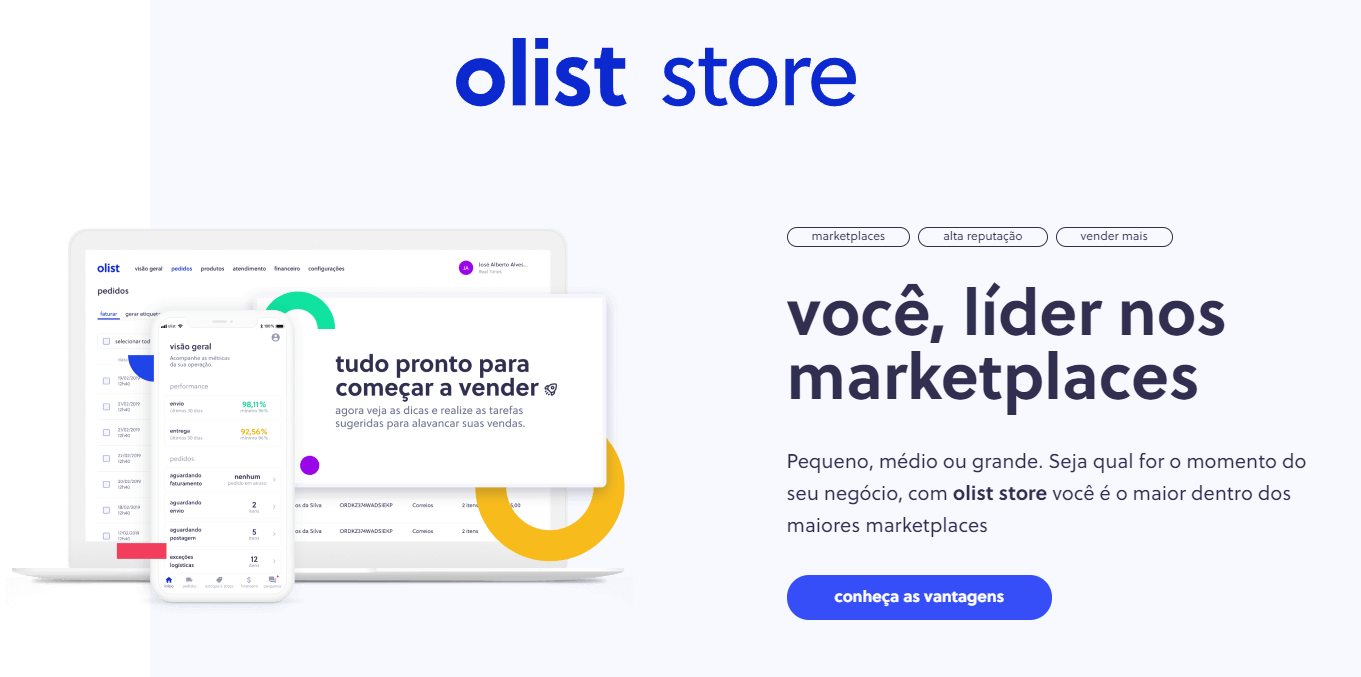

# Importation et préparation des données

Avant de commencer, nous vérifions que le code fourni respecte la convention PEP8.

In [1]:
# numpy and pandas pour la manipulation des données
import numpy as np
import pandas as pd
# matplotlib and seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns

# File system management
import os

# Suppress warnings
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importe mes fonctions personnalisées pour le projet Olist
from my_functions import *

import matplotlib.cm as cm
a, b, c, d, e = [
    plt.cm.Blues, plt.cm.Oranges, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples
]

# Visualisations
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df.head(2)

,customer_unique_id,nb_commandes,total_depense,moy_nb_moyens_paiements,moy_tot_versements_paiements,moy_review_score,moy_delai_livraison,autres,cadeaux,denrees_alimentaires,...,freight_ratio,moy_prix_commande,moy_prix_article,customer_zip_code_prefix,customer_city,j_derniere_commande,Etat_geo_client,geolocation_lat,geolocation_lng,d_harv
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.9,1.0,8.0,5.0,6.0,0.0,0.0,0.0,...,0.08,129.9,129.9,7787,cajamar,111,São Paulo,-23.340235,-46.830140,30.784607
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.9,1.0,1.0,4.0,3.0,0.0,0.0,0.0,...,0.30,18.9,18.9,6053,osasco,114,São Paulo,-23.559115,-46.787626,15.709783


# Corrélations

Nous allons à présent regarder s'il existe des corrélations linéaires fortes dans le jeu de données 

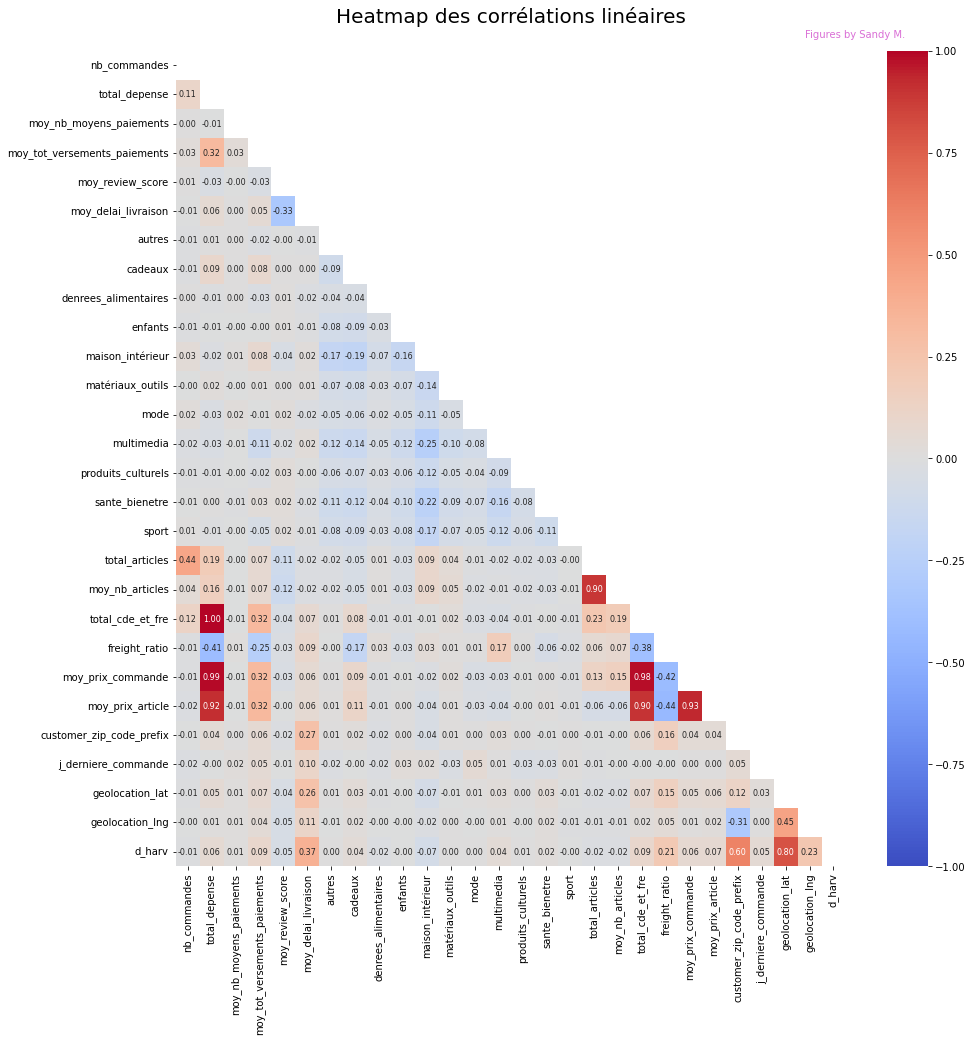

In [4]:
visualisation_corr(df)

On remarque que le prix total est très fortement corrélé au prix moyen par commande (idem pour le nombre d'articles moyen et le nombre d'articles total). Cela est dû au fait que la majorité des clients n'ont commandé qu'une seule fois. Cette variable sera donc moins corrélée au fil du temps.

In [5]:
df.describe()

,nb_commandes,total_depense,moy_nb_moyens_paiements,moy_tot_versements_paiements,moy_review_score,moy_delai_livraison,autres,cadeaux,denrees_alimentaires,enfants,...,moy_nb_articles,total_cde_et_fre,freight_ratio,moy_prix_commande,moy_prix_article,customer_zip_code_prefix,j_derniere_commande,geolocation_lat,geolocation_lng,d_harv
count,93103.000000,93103.000000,93103.000000,93103.000000,93103.000000,93103.000000,93103.000000,93103.000000,93103.000000,93103.000000,...,93103.000000,93103.000000,93103.000000,93103.000000,93103.000000,93103.000000,93103.000000,93103.000000,93103.000000,93103.000000
mean,1.033404,141.623651,1.022441,2.965898,4.158451,12.515610,0.078102,0.094742,0.014371,0.068435,...,1.141521,165.165339,0.208084,137.512885,125.827436,35165.860617,237.559789,-21.190596,-46.186175,522.488836
std,0.209085,215.748211,0.147232,2.717996,1.278436,9.546645,0.266774,0.291401,0.118167,0.250995,...,0.529929,226.349434,0.124874,209.914953,190.588627,29829.619115,152.622617,5.613595,4.056955,605.793998
min,1.000000,0.850000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,9.590000,0.000000,0.850000,0.850000,1003.000000,0.000000,-33.689948,-72.668881,0.123361
25%,1.000000,47.650000,1.000000,1.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,63.010000,0.120000,46.000000,42.900000,11355.000000,114.000000,-23.589847,-48.124775,51.908552
50%,1.000000,89.800000,1.000000,2.000000,5.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,107.780000,0.180000,87.000000,79.000000,24431.000000,219.000000,-22.924015,-46.632461,355.930464
75%,1.000000,154.440000,1.000000,4.000000,5.000000,16.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,182.455000,0.270000,149.900000,139.900000,58884.000000,346.000000,-20.135144,-43.622642,732.682802
max,15.000000,13440.000000,2.000000,26.000000,5.000000,210.000000,1.000000,1.000000,1.000000,1.000000,...,21.000000,13664.080000,0.960000,13440.000000,6735.000000,99980.000000,713.000000,42.184003,-8.723762,8281.463310


# La méthode RFM

La méthode de segmentation RFM permet d'établir une classification des clients en fonction de leurs habitudes de consommation. 
Elle se fait suivant 3 critères :

Récence : date de la dernière commande (variable 'j_derniere_commande')
Fréquence : fréquence des achats sur une période donnée ('nb_commandes')
Montant : somme des achats cumulés sur cette période ('total_depense').

Nous sélectionnons uniquement ces 3 variables pour établir notre première classification.

In [6]:
df_rfm = dataframe_rfm(df)

In [7]:
df_rfm.describe()

,Recent,Frequence,Montant
count,93103.000000,93103.000000,93103.000000
mean,237.559789,1.033404,141.623651
std,152.622617,0.209085,215.748211
min,0.000000,1.000000,0.850000
25%,114.000000,1.000000,47.650000
50%,219.000000,1.000000,89.800000
75%,346.000000,1.000000,154.440000
max,713.000000,15.000000,13440.000000


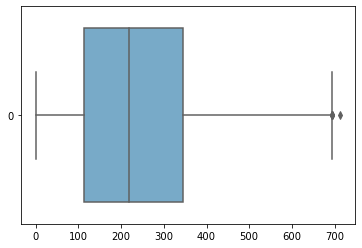

In [8]:
ax = sns.boxplot(data=df_rfm["Recent"], orient="h", palette="Blues")

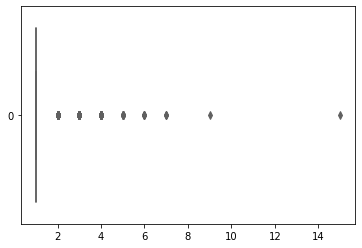

In [9]:
ax = sns.boxplot(data=df_rfm["Frequence"], orient="h", palette="Blues")

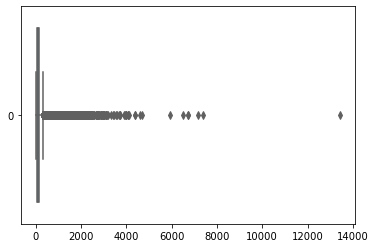

In [10]:
ax = sns.boxplot(data=df_rfm["Montant"], orient="h", palette="Blues")

In [11]:
quartiles = df_rfm.quantile(q=[0.25, 0.5, 0.75])
print(quartiles)

      Recent  Frequence  Montant
0.25   114.0        1.0    47.65
0.50   219.0        1.0    89.80
0.75   346.0        1.0   154.44


In [12]:
quartiles = quartiles.to_dict()
quartiles

{'Recent': {0.25: 114.0, 0.5: 219.0, 0.75: 346.0},
 'Frequence': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Montant': {0.25: 47.65, 0.5: 89.8, 0.75: 154.44}}

Nous souhaitons créer une base de données segmentée selon la place des valeurs au sein des quartiles de chaque variable.

La fonction score retourne un score suivant le quartile dans lequel se trouve la valeur. 

Le client idéal est celui qui se trouvera dans le groupe R : 1, F : 1, M : 1., c'est à dire qu'il a acheté récemment (quartile 1), qu'il achète fréquemment (quartile 4) et qu'il achète pour un grand montant (quartile 4).
Il faut distinguer deux types de scoring : celui dont le score 1 est pour le premier quartile (R) et celui dont le score 1 est pour le 4e quartile (F et M).

Deux fonctions score sont ainsi construites :

In [13]:
df_rfm_seg = df_segmentation_rfm(df_rfm, quartiles)

In [14]:
df_rfm_seg.head(2)

,Recent,Frequence,Montant,R_quartile,F_quartile,M_quartile
0,111,1,129.9,1,4,2
1,114,1,18.9,1,4,4


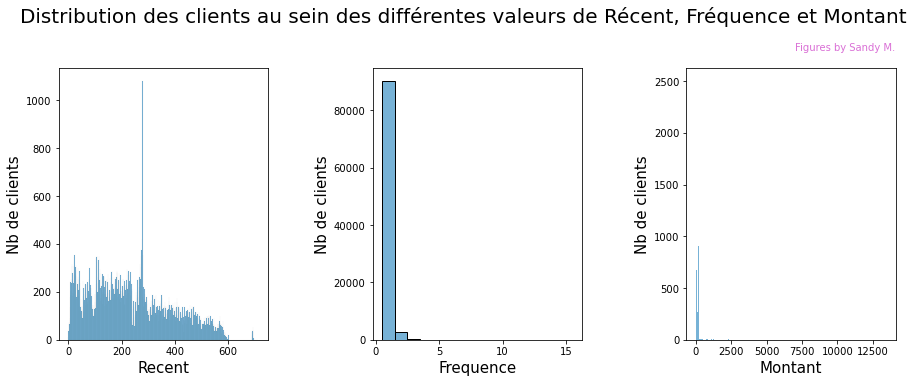

In [15]:
graph_rfm_brut(df_rfm_seg)

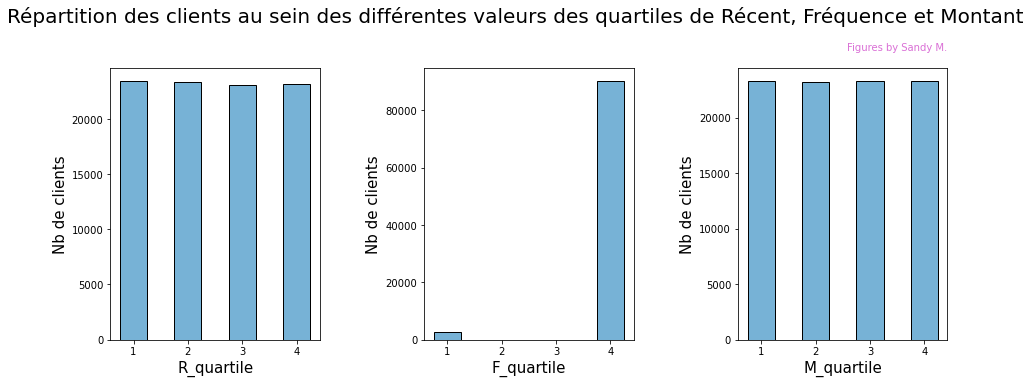

In [16]:
graph_rfm_qt(df_rfm_seg)

On remarque qu'en ce qui concerne la fréquence, les clients sont directement soit dans le quartile 1 soit dans le quartile 4. En effet, il y a tellement peu de clients qui commandent plusieurs fois que ceux qui le font sont directement dans le score 1.

Il est possible de créer une variable qui résume les 3 scores de chaque client.

In [17]:
df_rfm_seg = variable_rfm(df_rfm_seg)
df_rfm_seg


*Fonction by Sandy M.*

,Recent,Frequence,Montant,R_quartile,F_quartile,M_quartile,R-F-M
0,111,1,129.90,1,4,2,1-4-2
1,114,1,18.90,1,4,4,1-4-4
2,537,1,69.00,4,4,3,4-4-3
3,321,1,25.99,3,4,4,3-4-4
4,288,1,180.00,3,4,1,3-4-1
...,...,...,...,...,...,...,...
93098,447,1,1570.00,4,4,1,4-4-1
93099,262,1,64.89,3,4,3,3-4-3
93100,568,1,89.90,4,4,2,4-4-2
93101,119,1,115.00,2,4,2,2-4-2


En théorie, nous devrions avoir 4 * 4 * 4 = 64 valeurs uniques pour la variable 'R-F-M'.

In [18]:
len(df_rfm_seg['R-F-M'].unique())

32

Nous n'en avons que 32. C'est en partie à cause de la fréquence, qui fait passer le calcul des possibilités de 4 * 4 * 4 (64) à 4 * 2 * 4 (32).

Regardons comment se situent les moyennes et écarts-types des différents groupes R-F-M présents dans notre base de données. Il est intéressant aussi de regarder la taille des différents groupes pour en visualiser la disparité.

Afin de les visualiser plus facilement, une nouvelle base de données avec ces informations est créée.

In [19]:
statistiques = df_statistiques_rfm(df_rfm_seg)
statistiques


*Fonction by Sandy M.*

Recent         Frequence      Montant           taille_groupe
        mean     var      mean  var    mean       var              
R-F-M                                                              
1-1-1   59.3  1110.2       2.2  0.7   382.3  112420.6           498
1-1-2   56.4  1045.2       2.0  0.0   120.5     303.0           169
1-1-3   59.4  1105.8       2.0  0.0    69.6     142.8            94
1-1-4   53.1  1369.2       2.0  0.0    36.1      73.1            26
1-4-1   58.5  1096.3       1.0  0.0   362.6  141095.1          5392
1-4-2   58.8  1115.4       1.0  0.0   118.2     341.5          5790
1-4-3   55.9  1131.5       1.0  0.0    65.7     144.4          5669
1-4-4   56.6  1117.1       1.0  0.0    29.1     104.3          5837
2-1-1  169.4   900.7       2.2  0.4   343.7   54683.2           469
2-1-2  168.4   950.3       2.1  0.1   121.5     335.0           175
2-1-3  167.7   936.6       2.0  0.0    70.4     142.4            86
2-1-4  164.0   745.1       2.0  0.0    34.7      72.3            26
2-4-1  165.6   918.1       1.0  0.0   344.2   93290.6          5358
2-4-2  166.0   940.6       1.0  0.0   119.5     365.0          5783
2-4-3  166.8   930.3       1.0  0.0    65.7     157.9          5591
2-4-4  168.5   888.3       1.0  0.0    29.2     104.6          5864
3-1-1  277.5  1296.1       2.1  0.1   379.3   88367.7           398
3-1-2  277.7  1211.2       2.0  0.0   119.5     345.7           166
3-1-3  282.3  1165.3       2.0  0.0    69.0     157.3            95
3-1-4  287.4  1114.9       2.0  0.0    38.2      60.5            14
3-4-1  278.3  1211.0       1.0  0.0   345.3  123031.2          5374
3-4-2  277.6  1188.1       1.0  0.0   117.7     380.2          5557
3-4-3  276.9  1205.5       1.0  0.0    65.5     153.9          5916
3-4-4  276.6  1210.6       1.0  0.0    29.1     102.9          5543
4-1-1  434.5  4338.1       2.1  0.1   371.9  245706.0           310
4-1-2  436.8  4769.5       2.1  0.1   122.5     320.5           149
4-1-3  445.8  4037.8       2.1  0.3    70.1     160.2            83
4-1-4  483.9  6244.5       2.1  0.2    34.4      72.1            34
4-4-1  453.1  5309.7       1.0  0.0   359.9  129311.0          5477
4-4-2  452.3  4949.7       1.0  0.0   115.2     347.8          5433
4-4-3  446.5  4976.2       1.0  0.0    64.8     137.3          5794
4-4-4  454.6  5059.1       1.0  0.0    28.9     108.0          5933

In [20]:
%matplotlib widget

In [21]:
vis_3D_RFM(statistiques, "Recent", "Frequence", "Montant")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Les groupes de taille importante se trouvent au niveau du plan correspondant aux fréquences égales à 1. Se trouvent ensuite des petits groupes suivant le plan des fréquences =2. Puis 3 groupes dont la taille est légèrement plus grande, pour les fréquences au delà de 2.

In [22]:
statistiques_R_F_M = df_statistiques_rfm_quart(df_rfm_seg)
statistiques_R_F_M


*Fonction by Sandy M.*

,R_quartile,F_quartile,M_quartile,taille_groupe
,mean,mean,mean,
R-F-M,,,,
1-1-1,1.0,1.0,1.0,498
1-1-2,1.0,1.0,2.0,169
1-1-3,1.0,1.0,3.0,94
1-1-4,1.0,1.0,4.0,26
1-4-1,1.0,4.0,1.0,5392
1-4-2,1.0,4.0,2.0,5790
1-4-3,1.0,4.0,3.0,5669
1-4-4,1.0,4.0,4.0,5837


In [23]:
vis_3D_RFM(statistiques_R_F_M, "R_quartile", "F_quartile", "M_quartile")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [24]:
%matplotlib inline

## Détermination des groupes

32 groupes c'est encore beaucoup. Grâce à la représentation en 3D des clients suivant les quartiles R-F-M, regardons si nous pouvons identifier des groupes qui ont du sens d'un point de vue marketing.

- 1 : Les meilleurs clients. R-F-M = 1-1-1. Ce sont les clients parfaits. Ils achètent fréquemment, ont achetés récemment ou pour un grand montant.
- 2 : Les grands dépensiers. R-F-M = X-X-1. Ce sont les clients qui dépensent le plus d'argent pour leurs achats sur le site. Peu importe F et R (excepté F et R = 1). (2-1-1, 1-4-1, 2-4-1)
- 3 : Les habitués. R-F-M = X-1-X. Ce sont les clients qui ont un score de fréquence de 1 (donc un nombre de commande strictement supérieur à 1). (1-1-2, 1-1-3, 1-1-4, 2-1-2, 2-1-3, 2-1-4)
- 4 : Les nouveaux clients. R-F-M = 1-X-X. Ce sont les nouveaux clients à conquérir (1-4-2, 1-4-3, 1-4-4).
- 5 : Les clients perdus. R-F-M = 4-X-X. (4-1-1, 4-1-2, 4-1-3, 4-1-4, 4-4-1, 4-4-2, 4-4-3, 4-4-4). 
- 6 : Les anciens habitués. R-F-M = 3-1-X. (3-1-1, 3-1-2, 3-1-3, 3-1-4).
- 7 : Les clients à fidéliser. R-F-M = 2-4-X. (2-4-2, 2-4-3, 2-4-4).
- 8 : Les clients à reconquérir. R-F-M = 3-4-X. (3-4-1, 3-4-2, 3-4-3, 3-4-4).

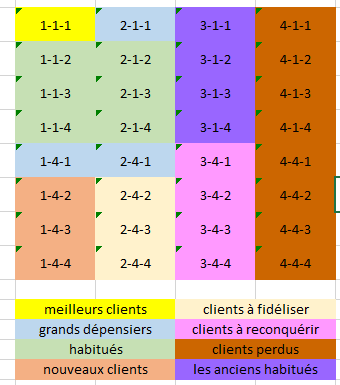

In [25]:
clients_seg = df_clients_seg()
clients_seg


*Fonction by Sandy M.*

,R-F-M,groupe_client
0,1-1-1,Meilleurs clients
1,X-X-1,Grands dépensiers
2,X-1-X,Habitués
3,1-X-X,Nouveaux clients
4,4-X-X,Clients perdus
5,3-1-X,Anciens habitués
6,2-4-X,Clients à fidéliser
7,3-4-X,Clients à reconquérir


## Détermination de la taille des groupes

In [26]:
clients_seg['Taille des groupes'] = taille_groupe_RFM(df_rfm_seg)
clients_seg


*Fonction by Sandy M.*

,R-F-M,groupe_client,Taille des groupes
0,1-1-1,Meilleurs clients,498
1,X-X-1,Grands dépensiers,5621
2,X-1-X,Habitués,6174
3,1-X-X,Nouveaux clients,17296
4,4-X-X,Clients perdus,23213
5,3-1-X,Anciens habitués,673
6,2-4-X,Clients à fidéliser,17238
7,3-4-X,Clients à reconquérir,22390


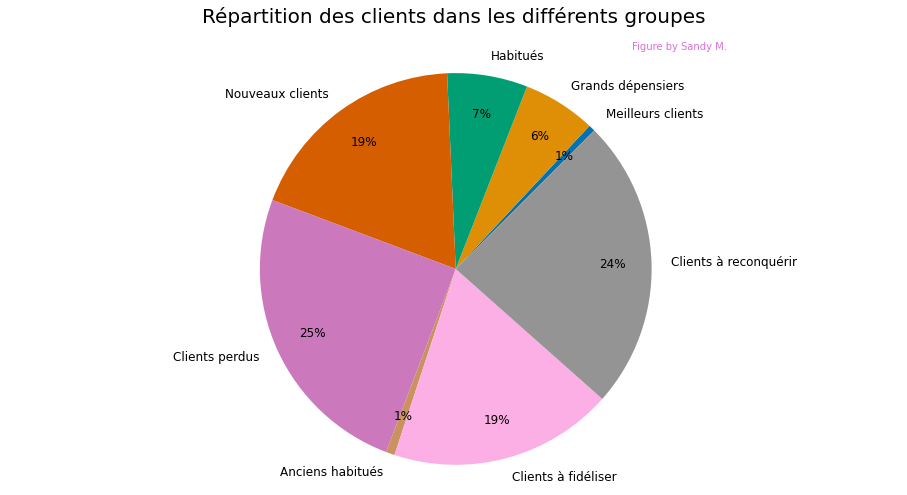

In [27]:
big_pie_sans_unk_2col(clients_seg, 'groupe_client', 'Taille des groupes',
                          'unknown')
plt.title("Répartition des clients dans les différents groupes",
          fontsize=20,
          pad=30)
plt.show()  # Affiche le graphique

In [28]:
df_rfm_seg = var_rfm_label(df_rfm_seg)
df_rfm_seg 


*Fonction by Sandy M.*

,Recent,Frequence,Montant,R_quartile,F_quartile,M_quartile,R-F-M,rfm_label
0,111,1,129.90,1,4,2,1-4-2,3
1,114,1,18.90,1,4,4,1-4-4,3
2,537,1,69.00,4,4,3,4-4-3,4
3,321,1,25.99,3,4,4,3-4-4,7
4,288,1,180.00,3,4,1,3-4-1,7
...,...,...,...,...,...,...,...,...
93098,447,1,1570.00,4,4,1,4-4-1,4
93099,262,1,64.89,3,4,3,3-4-3,7
93100,568,1,89.90,4,4,2,4-4-2,4
93101,119,1,115.00,2,4,2,2-4-2,6



*Table by Sandy M.*

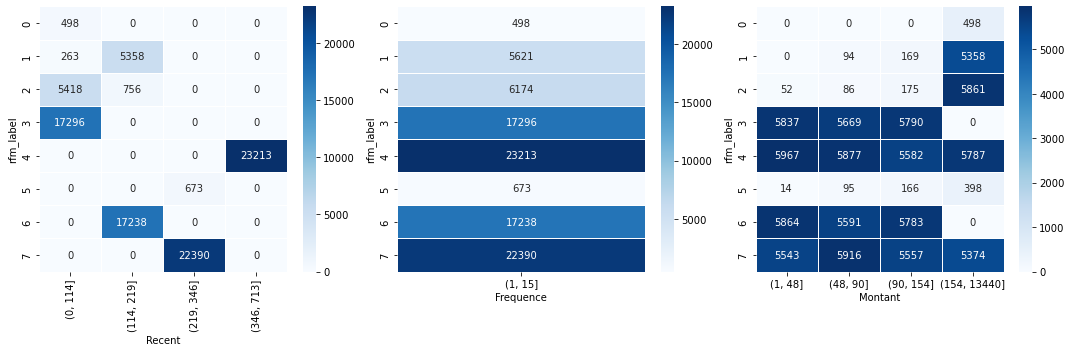

In [29]:
colonnes = ['Recent', 'Frequence', 'Montant']
table_cont(df_rfm_seg ,'rfm_label',colonnes)


*Table by Sandy M.*

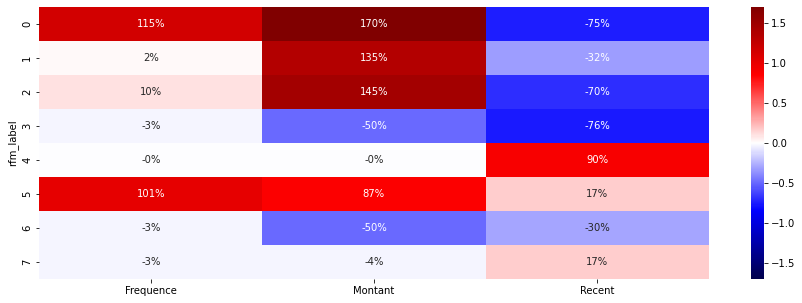

In [30]:
X = df_rfm_seg.drop(columns=["F_quartile", "R_quartile", "M_quartile"])
table_mean(X, 'rfm_label')

La méthode RFM nous donne 8 groupes malgré qu'elle n'utilise que 3 variables. C'est une bonne méthode pour facilement accéder à une segmentation primaire. Si l'objectif est de séparer les clients seulement grâce à ces variables, nous n'irions pas plus loin. Mais comment sait-on si le client est satisfait, si le client habite près de Sao Paolo ou à des milliers de kilomètres avec un décalage horaire de 4h ou encore, quels sont ses produits préférés.
Tout ceci peut être pris en compte par d'autres méthodes.